In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
#predicted_labels = np.load("./ndsb_dataset_nounk/predicted_labels_079_valid.npy")
predicted_labels = np.load("./experimentos/transfer_laps_cnn_079_ndsb_nounk_ffilter_2-3/predicted_labels_valid_ftteste5.npy")

#predictions= np.load("./ndsb_dataset_nounk/complete_predictions_079_valid.npy")
predictions= np.load("./experimentos/transfer_laps_cnn_079_ndsb_nounk_ffilter_2-3/complete_predictions_valid_ftteste5.npy")

#real_labels = np.load("./ndsb_dataset_nounk/real_labels_nounk.npy")
real_labels = np.load("./experimentos/transfer_laps_cnn_079_ndsb_nounk_ffilter_2-3/real_labels_valid_ftteste5.npy")

In [10]:
data = pd.DataFrame(predictions)


In [11]:
data['max'] = data.apply(max, axis=1)
data['predicted'] = predicted_labels
data['real'] = np.argmax(real_labels, axis=1)

In [12]:
classes = pd.DataFrame()
classes['bla'] = data['real'].value_counts()
classes = classes.sort_index()

In [13]:
classes['vp'] = data[data['predicted'] == data['real']]['real'].value_counts()
classes['fn'] = 0
classes['fp'] = 0
for i in classes.index:
    classes.fp[i] = data[data['predicted'] == i][data['real'] != i]['predicted'].count()
    classes.fn[i] = data[data['predicted'] != i][data['real'] == i]['real'].count()
classes = classes.sort_index()


C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [14]:
classes['recall'] = classes['vp']/(classes['vp'] + classes['fn'])
classes['precision'] = classes['vp']/(classes['vp'] + classes['fp'])
classes['f1_score'] = (classes['recall']*classes['precision']*2)/(classes['recall']+classes['precision'])
classes

,bla,vp,fn,fp,recall,precision,f1_score
0,21,19,2,5,0.904762,0.791667,0.844444
1,10,3,7,1,0.300000,0.750000,0.428571
2,44,38,6,9,0.863636,0.808511,0.835165
3,29,25,4,17,0.862069,0.595238,0.704225
4,11,2,9,3,0.181818,0.400000,0.250000
5,18,14,4,5,0.777778,0.736842,0.756757
6,30,23,7,9,0.766667,0.718750,0.741935
7,33,30,3,6,0.909091,0.833333,0.869565
8,26,18,8,2,0.692308,0.900000,0.782609
9,19,13,6,2,0.684211,0.866667,0.764706


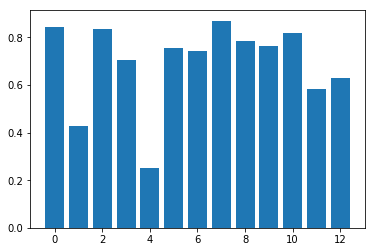

In [15]:
%matplotlib inline

f,a = plt.subplots()

aux = np.array(classes['f1_score'])
aux2 = np.array(classes.index)

a.bar(x=aux2, height=aux)

plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


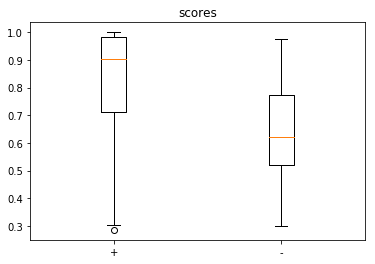

In [16]:
%matplotlib inline
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['max']
box_false = data[data['predicted'] != data['real']]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('scores')
    
f.subplots_adjust(hspace=0)
plt.show()


C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


loading 0
loading 1
loading 2
loading 3
loading 4
loading 5
loading 6
loading 7
loading 8
loading 9
loading 10
loading 11
loading 12


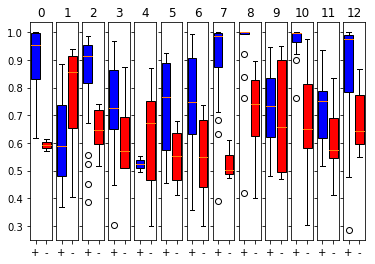

In [18]:
f, a = plt.subplots(1,13, sharex=False, sharey=True)

colors = ['blue', 'red']

for i in range(13):
    j = i
    box_true = data[data['predicted'] == j][data['real'] == j]['max']
    box_false = data[data['predicted'] != j][data['real'] == j]['max']
    print("loading", j)
    bplot = a[i].boxplot([box_true, box_false], widths=0.8, labels=['+', '-'],patch_artist=True)
    a[i].set_title(j)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


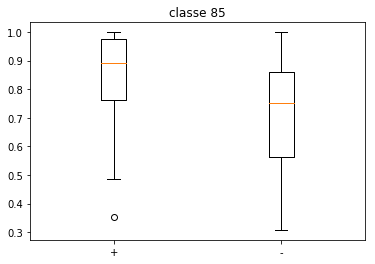

In [11]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 85]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 85]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 85')
    
f.subplots_adjust(hspace=0)
plt.show()


C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


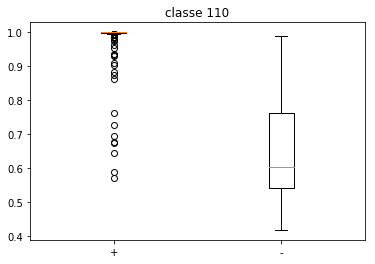

In [12]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 110]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 110]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 110')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


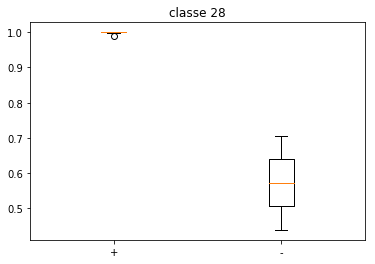

In [13]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 28]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 28]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 28')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


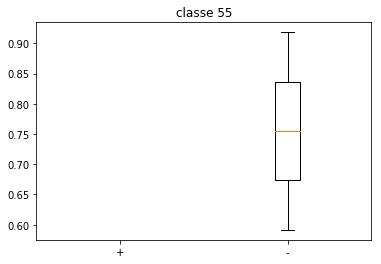

In [14]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 55]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 55]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 55')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


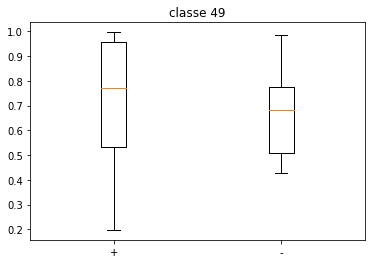

In [15]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 49]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 49]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 49')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


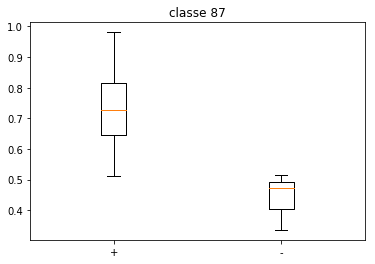

In [16]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 87]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 87]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 87')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


KeyError: 0

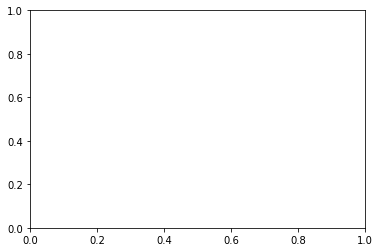

In [19]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 63]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 63]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 63')
    
f.subplots_adjust(hspace=0)
plt.show()

In [8]:
data.head()


,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,max,predicted,real
0,1.677075e-09,4.786375e-11,3.594240e-09,1.679737e-11,5.938936e-09,1.082488e-07,3.083749e-07,2.532832e-07,5.526845e-09,3.223322e-11,...,4.468440e-09,2.263083e-05,2.476573e-02,9.066468e-07,2.463525e-04,1.641271e-04,9.617066e-10,0.925386,97,97
1,1.567184e-14,1.993533e-16,6.275309e-14,3.610380e-12,7.813677e-04,9.430449e-01,5.525546e-02,1.709206e-06,2.341190e-10,2.494470e-14,...,2.225899e-16,4.877699e-10,4.180376e-07,8.919826e-11,8.229092e-11,1.207656e-10,1.040665e-12,0.943045,5,49
2,4.750972e-10,1.840355e-09,5.639497e-14,3.493094e-07,1.201318e-11,1.466741e-13,4.452224e-14,7.385920e-15,4.755611e-15,2.609627e-17,...,9.035506e-10,2.360619e-15,5.075025e-15,1.020768e-17,2.771237e-15,4.714207e-17,1.859444e-13,0.715322,19,14
3,9.335568e-11,1.511868e-10,2.866828e-14,1.837186e-10,5.490438e-24,1.582572e-22,6.966642e-23,1.030901e-20,1.479869e-17,2.848979e-12,...,8.472863e-17,6.407109e-16,6.492397e-20,3.229468e-19,2.050567e-20,2.013915e-20,2.051638e-21,0.999926,110,110
4,4.064904e-03,4.607418e-05,3.466596e-05,1.939644e-03,2.309766e-05,3.624614e-05,1.877559e-04,1.775351e-03,4.982101e-05,3.479077e-04,...,1.337995e-05,1.945454e-04,2.701508e-04,2.434026e-04,5.457456e-05,7.000696e-06,9.895720e-05,0.368563,40,40


In [19]:
def threshold(serie):
    if serie['max'] >= 0.5:
        return serie['max']
    else:
        return 0

data['unknown'] = data.apply(threshold, axis=1)

data.head()


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,max,predicted,real,unknown
0,0.000001,0.000011,0.000001,0.000002,5.027715e-08,2.089477e-08,0.000278,0.824350,0.095187,0.000540,...,4.630315e-07,4.910220e-07,5.125595e-07,3.425821e-07,4.136130e-07,3.799433e-07,0.824350,7,7,0.824350
1,0.002215,0.001357,0.004304,0.000220,3.247456e-05,3.150916e-05,0.000325,0.001485,0.000213,0.000310,...,9.010506e-05,1.465863e-04,1.550388e-04,9.234465e-05,8.080804e-05,1.912639e-04,0.652015,11,11,0.652015
2,0.000108,0.000660,0.101380,0.847988,4.558541e-02,2.107611e-03,0.000122,0.000018,0.001974,0.000004,...,6.065031e-06,1.027951e-05,1.073188e-05,6.325337e-06,6.884447e-06,4.864590e-06,0.847988,3,3,0.847988
3,0.403943,0.002965,0.006953,0.004864,2.002581e-01,2.988560e-01,0.026308,0.040699,0.002280,0.000991,...,1.614643e-04,7.458287e-05,1.444553e-04,1.162960e-04,1.061957e-04,1.584156e-04,0.403943,0,4,0.000000
4,0.394004,0.571988,0.012107,0.000784,5.051585e-04,5.662740e-04,0.003788,0.007549,0.003057,0.001136,...,3.103389e-05,3.565975e-05,2.033628e-05,3.424896e-05,3.890035e-05,2.522881e-05,0.571988,1,0,0.571988


In [20]:
knowns = data['unknown'].value_counts()


In [21]:
print(len(data[1]))
print(knowns[0])

320
35


In [22]:
a = (len(data[1])-knowns[0])/len(data[1])
a

0.890625

In [23]:
knowns_count = len(data[data['unknown'] != 0][data['predicted'] == data['real']])

w_knowns_count = len(data[data['unknown'] != 0][data['predicted'] != data['real']])

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
acc = knowns_count/(knowns_count + w_knowns_count)
acc

0.7684210526315789